<a href="https://colab.research.google.com/github/melohux/Image-Mining_TP2/blob/main/PyTorch_cifar10_tutorial_ROB313_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Image Classification

Welcome to deep learning for image classification tutorial!
**In this notebook, you will**:
- Learn the basics of PyTorch, a powerful but easy to use package for scientific computing (and deep learning)
- Learn how to build and train a convolutional neural network for image classification.

If you have never used jupyter notebooks, nor Colab notebooks, [here](https://colab.research.google.com/notebooks/welcome.ipynb) is a short intro.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you know already how to use PyTorch, then you can directly go to the second part of this tutorial

## II. Training a classifier

In this part, we will train a Convolutional Neural Network to classify images of 10 different classes (dogs, cats, car, ...) and see how our model performs on the test set.  


## III. Exploring CNN Architectures

This is the part where you get your hands dirty ;). Your mission is to experiment different CNN architectures and set hyperparameters in order to obtain the best accuracy on the test set!


The following command sets the backend of matplotlib to the 'inline' backend so that the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it:

In [ ]:
%matplotlib inline

### Plotting functions and useful imports

You can skip this part

In [ ]:
# Python 2/3 compatibility
from __future__ import print_function, division

import itertools
import time


import numpy as np
import matplotlib.pyplot as plt

# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    img = img / 2 + 0.5     
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))



def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 8))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# I. What is PyTorch ?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


## PyTorch Basics

In the next steps, we will briefly see how to use PyTorch and exploit its power:

1. PyTorch Installation
2. PyTorch Tensors
3. Numpy Bridge
4. Automatic differentiation
5. PyTorch and GPU (CUDA support)


### 1. Install PyTorch and Torchvision



In [ ]:
import numpy as np
# Import torch and create the alias "th"
# instead of writing torch.name_of_a_method() , we only need to write th.name_of_a_method()
# (similarly to numpy imported as np)
import torch as th

In [ ]:
# Create tensor of ones (FloatTensor by default)
ones = th.ones(3, 2)
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


### 2. PyTorch Tensors

A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to numpy’s ndarrays, but they have a super-power: Tensors can also be used on a GPU to accelerate computing.

#### Tensor Shape
To know the shape of a given tensor, you can use the `.size()` method (the numpy equivalent is `.shape`)

In [ ]:
# Display the shape of a tensor
# it can be used as a tuple
print("Tensor Shape: {}".format(ones.size()))

Tensor Shape: torch.Size([3, 2])


#### Reshape tensors

To reshape tensors (e.g. flatten a 3D tensor to a 1D array), you can use the `.view()` method:

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

[WARNING] when precising a new shape, you have to make sure that the number of elements is constant.
For example, a 2D matrix of size 3x3 can only be viewed as a 1D array of size $3 \cdot 3 = 9$

In [ ]:
# Create a 3D tensor of size 3x2x2
zeros_3d_tensor = th.zeros(3, 2, 2)
print("Original size:", zeros_3d_tensor.size())

# Reshape it to a 1D array of size 3*2*2 = 12
zeros_1d_array = zeros_3d_tensor.view(3 * 2 * 2)
print("Reshaped tensor:", zeros_1d_array.size())


# Let's view our original tensor as a 2D matrix
# If you want PyTorch to guess one remaining dimension,
# you specify '-1' instead of the actual size
zeros_2d_matrix = zeros_3d_tensor.view(-1, 2 * 2)

print("Matrix shape:", zeros_2d_matrix.size())

Original size: torch.Size([3, 2, 2])
Reshaped tensor: torch.Size([12])
Matrix shape: torch.Size([3, 4])


#### Basic Operations on tensors

Tensor support all basic linear algebra operations. You can read the full documentation [here](http://pytorch.org/docs/master/tensors.html)

In [ ]:
2 * ones + 1

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])

PyTorch tensors also supports numpy indexing:

In [ ]:
print("\n Indexing Demo:")
print(ones[:, 1])


 Indexing Demo:
tensor([1., 1., 1.])


### 3. Numpy Bridge
WARNING: PyTorch Tensors are different from numpy arrays
even if they have a lot in common

Though, it is **easy with PyTorch to tranform Tensors to Numpy arrays and vice versa**

#### Numpy <-> PyTorch

Creating PyTorch tensors from numpy array is done via the `torch.from_numpy()` function  
(here `th.from_numpy()` because we renamed *torch* as *th*)

To transform a PyTorch tensor to a numpy array, you can simply call `.numpy()` method.

In [ ]:
# np.float32 -> th.FloatTensor
ones_matrix = np.ones((2, 2), dtype=np.float32)

# the matrix is passed by reference:
# if we modify the original numpy array, the tensor is also edited
ones_tensor = th.from_numpy(ones_matrix)
# Convert back to a numpy matrix
numpy_matrix = ones_tensor.numpy()

print("PyTorch Tensor:")
print(ones_tensor)

print("Numpy Matrix:")
print(numpy_matrix)

PyTorch Tensor:
tensor([[1., 1.],
        [1., 1.]])
Numpy Matrix:
[[1. 1.]
 [1. 1.]]


### 4. Automatic Differentiation

Pytorch tensors allow to **automatically compute gradients**. That is particulary useful for backpropagation.

Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the gradient w.r.t. this variable using `.grad`.


In [ ]:
# We need to specify that we want to compute the gradient
# as it requires extra memory and computation
ones_tensor = th.ones(2,2, requires_grad=True)

print(ones_tensor)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


To demonstrate the use of PyTorch Variable,
let's define a simple linear transformation of a variable $x$ :

$$y = a \cdot x + b$$

PyTorch will allows us to automatically compute $$\frac{dy}{dx} $$

In [ ]:
# Create a tensor and tell PyTorch
# that we want to compute the gradient
x = th.ones(1, requires_grad=True)

# Transformation constants
a = 2
b = 5

# Define the tranformation and store the result
# in a new variable
y = a * x + b

print(y)

tensor([7.], grad_fn=<AddBackward0>)


Let's backprop!

In [ ]:
y.backward()

`x.grad` prints the gradient:

$$\frac{dy}{dx} = a$$

because:

$$y = a \cdot x + b$$

In [ ]:
x.grad

tensor([2.])

You can now change the values of $a$ and $b$ see their effects on the gradient
(HINT: `x.grad` only depends on the value of `a`)

### 5. PyTorch and GPU (CUDA support)

Google colab provides a CUDA enabled GPU, so we are going to use its power. 
You can move tensor to the GPU by simply using the `to()` method.
Otherwise, PyTorch will use the CPU.

Here, we will demonstrate the usefulness of the GPU on a simple matrix multiplication:

In [ ]:
if th.cuda.is_available():
  # Create tensors
  x = th.ones(1000, 1000)
  y = 2 * x + 3
  # Do the calculation on cpu (default)
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_cpu = time.time() - start_time
  
  # Do the same calculation but on the gpu
  # First move tensors to gpu
  x = x.to("cuda")
  y = y.to("cuda")
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_gpu = time.time() - start_time
  
  print("Time on CPU: {:.5f}s \t Time on GPU: {:.5f}s".format(time_cpu, time_gpu))
  print("Speed up: Computation was {:.0f}X faster on GPU!".format(time_cpu / time_gpu))
  
else:
  print("You need to enable GPU accelaration in colab (runtime->change runtime type)")

Time on CPU: 0.06598s 	 Time on GPU: 0.00308s
Speed up: Computation was 21X faster on GPU!


As expected, matrix multiplication is way faster on a GPU, so we'd better use it.


# II. Training a classifier


For this tutorial, we will use the CIFAR10 dataset.
There are 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


![CIFAR10](http://pytorch.org/tutorials/_images/cifar10.png)


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Loading and normalizing CIFAR10 Dataset

Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Seed the random generator to have reproducible results:

In [ ]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

if th.cuda.is_available():
  # Make CuDNN Determinist
  th.backends.cudnn.deterministic = True
  th.cuda.manual_seed(seed)

# Define default device, we should use the GPU (cuda) if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")


### Define subset of the dataset (so it is faster to train)

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 40000 # Max: 50 000 - n_val_samples
n_val_samples = 10000


train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
#test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))  # we can use it to test on a subset
# (In the last case, indexes do not need to account for training ones because the train=False parameter in datasets.CIFAR will select from the test set)

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]



In [ ]:
num_workers = 5
test_batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch_size, sampler=train_sampler,
                                          num_workers=num_workers)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size,
                                         num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



     horse        cat        cat      horse



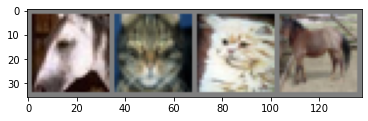

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

### 2. Define a Convolution Neural Network


In [ ]:
# Useful imports
import torch.nn as nn
import torch.nn.functional as F

####  Forward propagation

In PyTorch, there are built-in functions that carry out the convolution steps for you.

- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

#### Simple Convolutional Neural Network

ConvNet with one convolution layer followed by a max pooling operation,
one fully connected layer and an output layer

In [ ]:
class SimpleConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(SimpleConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # cf comments in forward() to have step by step comments
        # on the shape (how we pass from a 3x32x32 input image to a 18x16x16 volume)
        self.fc1 = nn.Linear(18 * 16 * 16, 64) 
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        # 18x16x16 -> 4608
        x = x.view(-1, 18 * 16 * 16)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        # The softmax non-linearity is applied later (cf createLossAndOptimizer() fn)
        x = self.fc2(x)
        return x

#### Linear Classifier

In [ ]:
class LinearClassifier(nn.Module):
    """
    Linear Classifier
    """
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        # Flatten input 3x32x32 -> 3072
        x = x.view(x.size(0), -1)
        return self.linear(x)

### 3. Define a loss function and optimizer

Let's use a Classification Cross-Entropy loss and ADAM (optionally, SGD with momentum). You can read more about  [optimization methods](https://pytorch.org/docs/stable/optim.html).



In [ ]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    # it combines softmax with negative log likelihood loss
    criterion = nn.CrossEntropyLoss()  
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    return criterion, optimizer

### 4. Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, feed the inputs to the network, and optimize



#### Data loader

In [ ]:
def get_train_loader(batch_size):
    return torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler,
                                              num_workers=num_workers)

# Use larger batch size for validation to speed up computation
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)

#### Training loop
The training script: it takes ~10s per epoch with batch_size = 32

In [ ]:
def train(net, batch_size, n_epochs, learning_rate, verbose = True):
    """
    Train a neural network and print statistics of the training
    
    :param net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("\n")
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []

    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"
    
    # Move model to gpu if possible
    net = net.to(device)

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, (inputs, labels) in enumerate(train_loader):

            # Move tensors to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            total_train_loss += loss.item()

            # print every 10th of epoch
            if verbose == True:
                if (i + 1) % (print_every + 1) == 0:    
                    print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                          epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                          time.time() - start_time))
                    running_loss = 0.0
                    start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        # Do a pass on the validation set
        # We don't need to compute gradient,
        # we save memory and computation using th.no_grad()
        with th.no_grad():
          for inputs, labels in val_loader:
              # Move tensors to correct device
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              predictions = net(inputs)
              val_loss = criterion(predictions, labels)
              total_val_loss += val_loss.item()
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)
        if verbose == True:
            print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("\nTraining Finished with best validation loss {:.2f}".format(best_error / len(val_loader)))
    print("Took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history

In [ ]:
net = SimpleConvolutionalNetwork()

train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001, verbose = False)



===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001

Training Finished with best validation loss 1.07
Took 125.81s


Now, let's look at the evolution of the losses

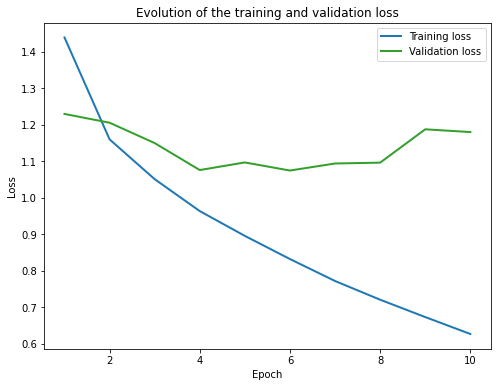

In [ ]:
plot_losses(train_history, val_history)

### 5. Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Ground truth:

       cat       ship       ship      plane


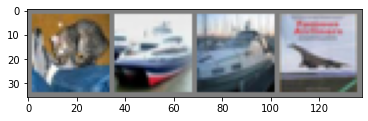

In [ ]:
try:
  images, labels = next(iter(test_loader))
except EOFError:
  pass

# print images
imshow(torchvision.utils.make_grid(images))
print("Ground truth:\n")

print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images.to(device))
print(outputs.size())

torch.Size([4, 10])


The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is from that particular class.
So, let's get the index of the highest energy:



Predicted:

       cat       ship       ship       ship


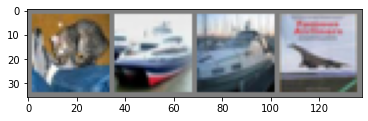

In [ ]:
_, predicted = torch.max(outputs, 1)

print("Predicted:\n")
imshow(torchvision.utils.make_grid(images))

print(' '.join('{:>10}'.format(classes[predicted[j]]) for j in range(test_batch_size)))

The results seem pretty good.

Let us look at how the network performs on the whole test set.



In [ ]:
def dataset_accuracy(net, data_loader, name=""):
    net = net.to(device)
    correct = 0
    total = 0
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy = 100 * float(correct) / total
    print('Accuracy of the network on the {} {} images: {:.2f} %'.format(total, name, accuracy))
    return accuracy

def train_set_accuracy(net):
    acc = dataset_accuracy(net, train_loader, "train")
    return acc

def val_set_accuracy(net):
    acc = dataset_accuracy(net, val_loader, "validation")  
    return acc
    
def test_set_accuracy(net):
    acc = dataset_accuracy(net, test_loader, "test")
    return acc

def compute_accuracy(net):
    train = train_set_accuracy(net)
    val = val_set_accuracy(net)
    test = test_set_accuracy(net)
    return train, val, test
    
# print("Computing accuracy...")
# compute_accuracy(net)

That initial 63.78 % on the test set of images looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.
As a baseline, a linear model achieves around 30% accuracy.

What are the classes that performed well, and the classes that did not perform well?



**Answer**: We find that the classification of classes of plane, car, ship and truck performs the best while the classification of class of cat, bird and dog performs the worst.

In [ ]:
def accuracy_per_class(net):
    net = net.to(device)
    n_classes = 10
    # (real, predicted)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for images, labels in test_loader:
        images, labels = images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(test_batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        percentage_correct = 100.0 * float(class_correct) / class_total
        
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    return confusion_matrix

confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        59.40   
car          60.30   
bird         47.80   
cat          47.80   
deer         62.30   
dog          52.60   
frog         71.80   
horse        73.50   
ship         77.90   
truck        73.90   


### Confusion Matrix

Let's look at what type of error our networks makes... 
It seems that our network is pretty good at classifying ships,
but has some difficulties to differentiate cats and dogs.
Also, it classifies a lot of trucks as cars.

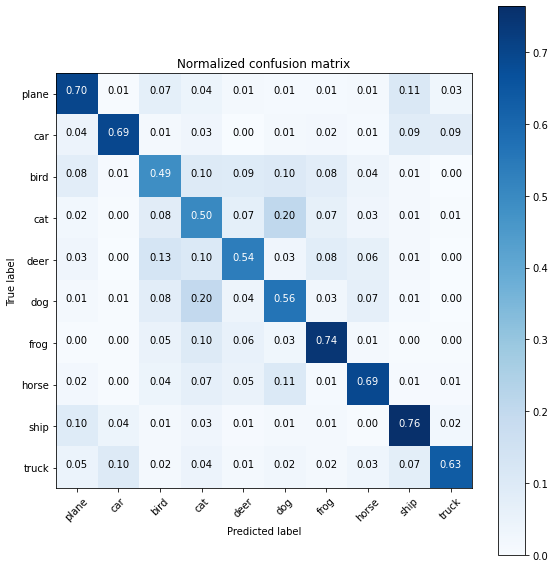

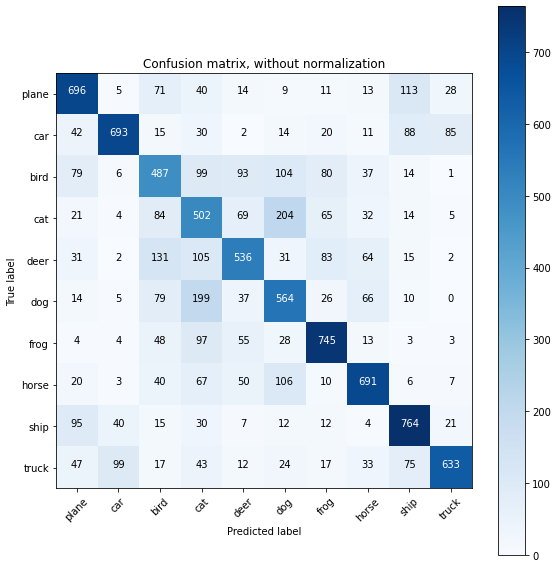

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

# III. Exploring CNN Architectures

Now, it is your turn to build a Convolutional Neural Network. The goal of this section is to explore different CNN architectures and set hyperparameters in order to obtain the best accuracy on the **test** set!

The network that you have to tweak is called **MyConvolutionalNetwork**.

You can start **changing the batch_size, number of epochs and then try adding more convolutional layers**.

### PyTorch functions to build the network
- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the element-wise ReLU of Z1 (which can be of any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected (fc) layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

**Convolution Formulas**:

The formulas relating the output shape $(C_2, H_2, W_2)$ of the convolution to the input shape $(C_1, H_1, W_1)$ are:


$$ H_2 = \lfloor \frac{H_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ W_2 = \lfloor \frac{W_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ C_2 = \text{number of filters used in the convolution}$$

NOTE: $C_2 = C_1$ in the case of max pooling

where:
- $H_2$: height of the output volume  
- $W_2$: width of the output volume  
- $C_1$: in_channels, number of channels in the input volume
- $C_2$: out_channels

In [ ]:
def get_output_size(in_size, kernel_size, stride=1, padding=0):
    """
    Get the output size given all the parameters of the convolution
    :param in_size: (int) input size
    :param kernel_size: (int)
    :param stride: (int)
    :param paddind: (int)
    :return: (int)
    """
    return int((in_size - kernel_size + 2 * padding) / stride) + 1

#### Example of use of helper method get_output_size() 

Let's assume you have an *input volume of size 3x32x32* (where 3 is the number of channels)
and you use a 2D convolution with the following parameters:

```python
conv1 = nn.Conv2d(3, 18, kernel_size=7, stride=2, padding=1)
```
then, the size of the output volume is 18x?x? (because we have 18 filters) where ? is given by the convolution formulas (see above).

**get_output_size()** function allows to compute that size:

```
out_size = get_output_size(in_size=32, kernel_size=7, stride=2, padding=1)
print(out_size) # prints 14
```

That is to say, *the output volume is 18x14x14*

In [ ]:
out_size = get_output_size(in_size=32, kernel_size=3, stride=1, padding=1)
print(out_size)

32


Below is the neural network you have to edit:

In [ ]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        
        # Size of the output of the last convolution:
        self.flattened_size = 18 * 16 * 16
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [ ]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)



===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.95 took: 1.34s
Epoch 1, 20% 	 train_loss: 1.69 took: 1.13s
Epoch 1, 30% 	 train_loss: 1.57 took: 1.14s
Epoch 1, 40% 	 train_loss: 1.51 took: 1.13s
Epoch 1, 50% 	 train_loss: 1.41 took: 1.10s
Epoch 1, 60% 	 train_loss: 1.38 took: 1.13s
Epoch 1, 70% 	 train_loss: 1.35 took: 1.13s
Epoch 1, 80% 	 train_loss: 1.35 took: 1.13s
Epoch 1, 90% 	 train_loss: 1.36 took: 1.13s
Validation loss = 1.30
Epoch 2, 10% 	 train_loss: 1.23 took: 1.32s
Epoch 2, 20% 	 train_loss: 1.26 took: 1.13s
Epoch 2, 30% 	 train_loss: 1.25 took: 1.12s
Epoch 2, 40% 	 train_loss: 1.21 took: 1.15s
Epoch 2, 50% 	 train_loss: 1.20 took: 1.14s
Epoch 2, 60% 	 train_loss: 1.20 took: 1.14s
Epoch 2, 70% 	 train_loss: 1.19 took: 1.13s
Epoch 2, 80% 	 train_loss: 1.21 took: 1.13s
Epoch 2, 90% 	 train_loss: 1.16 took: 1.12s
Validation loss = 1.19
Epoch 3, 10% 	 train_loss: 1.13 took: 1.36s
Epoch 3, 20% 	 train_loss: 1.07 took: 1

### Losses Plot

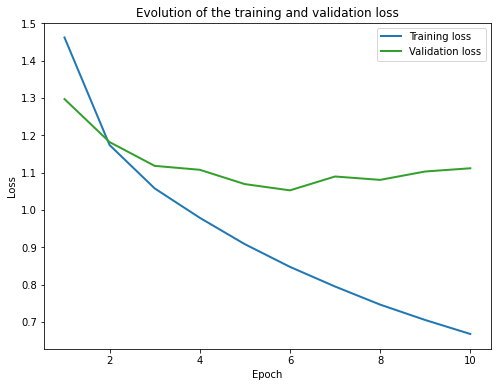

In [ ]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [ ]:
compute_accuracy(net)

Accuracy of the network on the 40000 train images: 74.36 %
Accuracy of the network on the 10000 validation images: 64.43 %
Accuracy of the network on the 10000 test images: 63.68 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [ ]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        68.10   
car          73.80   
bird         49.90   
cat          43.40   
deer         56.30   
dog          52.40   
frog         76.50   
horse        74.50   
ship         73.90   
truck        68.00   


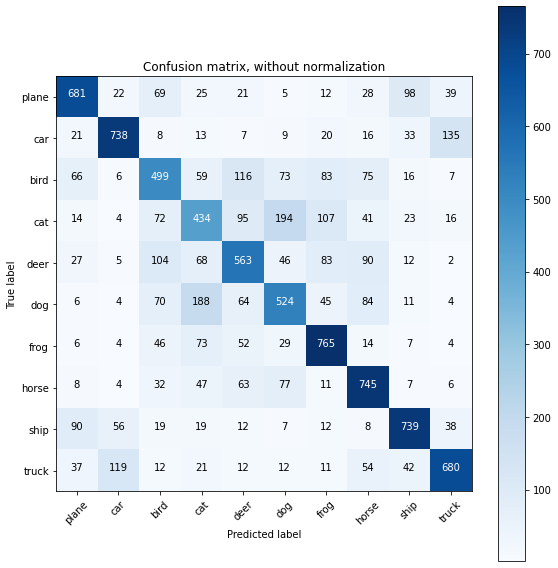

In [ ]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

# Report - HU Xiwei

In this lab work, we explore the impact of different parameters of the convolutional neural network and the performance of different network architectures for CIFAR10 task. 

Firstly, we change hyperparameters, such as batch size, learning rate and number of training epochs, based on the most simple convolutional neural network with only one convolutional layer and two full connected layers. We would like to explore the evolution of model performance with respect to different hyperparameters.

## Hyperparameters

### Batch size

In this section, we test our model with different batch size while keeping learning rate as 0.001 and total training epochs as 10.

In [ ]:
batch_sizes = [4, 8, 16, 32, 64, 128]
train_h = []
val_h = []

train_acc = []
val_acc = []
test_acc = []

for bs in batch_sizes:
    net = MyConvolutionalNetwork()
    train_history, val_history = train(net, batch_size=bs, n_epochs=10, learning_rate=0.001, verbose=False)
    train_h.append(train_history)
    val_h.append(val_history)

    train_a, val_a, test_a = compute_accuracy(net)
    train_acc.append(train_a)
    val_acc.append(val_a)
    test_acc.append(test_a)




===== HYPERPARAMETERS =====
batch_size= 4
n_epochs= 10
learning_rate= 0.001

Training Finished with best validation loss 1.17
Took 439.60s
Accuracy of the network on the 40000 train images: 67.22 %
Accuracy of the network on the 10000 validation images: 61.16 %
Accuracy of the network on the 10000 test images: 60.02 %


===== HYPERPARAMETERS =====
batch_size= 8
n_epochs= 10
learning_rate= 0.001

Training Finished with best validation loss 1.21
Took 254.03s
Accuracy of the network on the 40000 train images: 72.09 %
Accuracy of the network on the 10000 validation images: 62.19 %
Accuracy of the network on the 10000 test images: 62.12 %


===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.001

Training Finished with best validation loss 1.16
Took 173.04s
Accuracy of the network on the 40000 train images: 73.42 %
Accuracy of the network on the 10000 validation images: 64.07 %
Accuracy of the network on the 10000 test images: 63.70 %


===== HYPERPARAMETERS =====
bat

We plot the training loss and validation loss curve of experiments with different batch size as follows. We find that:
* Small batch size setting takes more time to train than large batch size setting.
* When the batch size is smaller, the loss curve is more noisy while with larger batch size, the loss curve is smoother.
* When the batch size is too small or too large, the validation loss will miss the lowest point (as shown in figures of batch size = 4, 64, 128).

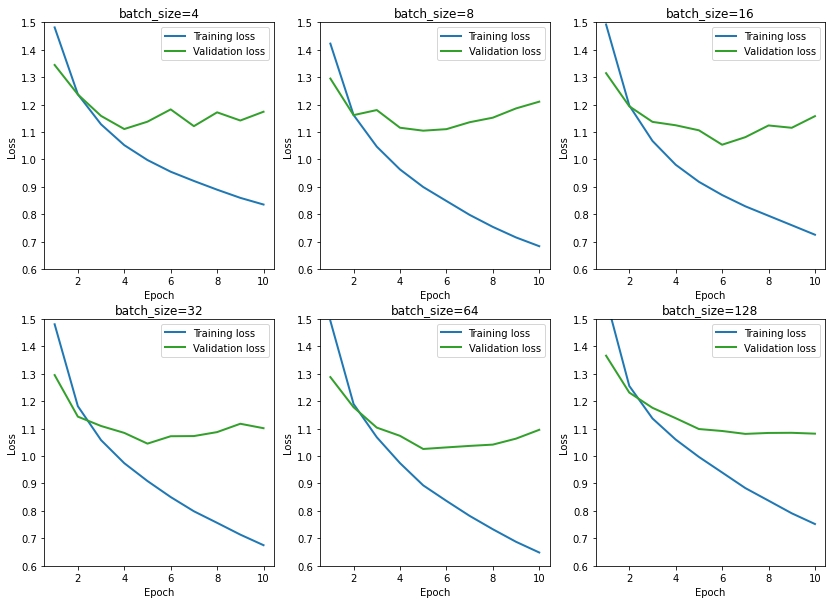

In [ ]:
x = np.arange(1, len(train_h[0]) + 1)

plt.figure(figsize=(14,10))

def plot(x, line1, line2, ylimit=[0.6,1.5], title=""):
    plt.plot(x, line1, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, line2, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(ylimit[0], ylimit[1])
    plt.legend(loc='upper right')
    plt.title(title)

plt.subplot(231)
plot(x, train_h[0], val_h[0], title="batch_size=4")

plt.subplot(232)
plot(x, train_h[1], val_h[1], title="batch_size=8")

plt.subplot(233)
plot(x, train_h[2], val_h[2], title="batch_size=16")

plt.subplot(234)
plot(x, train_h[3], val_h[3], title="batch_size=32")

plt.subplot(235)
plot(x, train_h[4], val_h[4], title="batch_size=64")

plt.subplot(236)
plot(x, train_h[5], val_h[5], title="batch_size=128")


plt.show()

We plot the train, validation and test accuracy curves with respect to different batch size. We find that too small batch size and too large batch size will result in a bad accuracy in all train set, validation set and test set. **Considering the training time and optimal validation/test accuracy, we take batch size as 64 in the following experiments.**

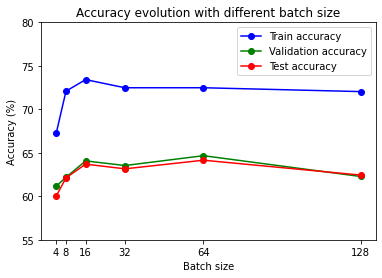

In [ ]:
x = batch_sizes
# plot(x, train_acc, val_acc, ylimit=[40, 100], title="batch_size=4")
plt.plot(x, train_acc, color="blue", label="Train accuracy", marker='o')
plt.plot(x, val_acc, color="green", label="Validation accuracy", marker='o')
plt.plot(x, test_acc, color="red", label="Test accuracy", marker='o')
plt.xlabel('Batch size')
plt.ylabel('Accuracy (%)')
plt.ylim(55, 80)
plt.xticks(x)
plt.legend(loc='upper right')
plt.title("Accuracy evolution with different batch size")
plt.show()

### Learning rate

In this section, we test our model with different learning rate while keeping batch size as 64 and total training epochs as 10.

In [ ]:
lrs = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
train_h_lr = []
val_h_lr = []

train_acc_lr = []
val_acc_lr = []
test_acc_lr = []

for lr in lrs:
    net = MyConvolutionalNetwork()
    train_history, val_history = train(net, batch_size=64, n_epochs=10, learning_rate=lr, verbose=False)
    train_h_lr.append(train_history)
    val_h_lr.append(val_history)

    train_a, val_a, test_a = compute_accuracy(net)
    train_acc_lr.append(train_a)
    val_acc_lr.append(val_a)
    test_acc_lr.append(test_a)




===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 10
learning_rate= 1e-05

Training Finished with best validation loss 1.60
Took 109.62s
Accuracy of the network on the 40000 train images: 46.12 %
Accuracy of the network on the 10000 validation images: 44.48 %
Accuracy of the network on the 10000 test images: 45.49 %


===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 10
learning_rate= 5e-05

Training Finished with best validation loss 1.31
Took 111.11s
Accuracy of the network on the 40000 train images: 57.18 %
Accuracy of the network on the 10000 validation images: 54.10 %
Accuracy of the network on the 10000 test images: 54.49 %


===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 10
learning_rate= 0.0001

Training Finished with best validation loss 1.25
Took 111.03s
Accuracy of the network on the 40000 train images: 59.98 %
Accuracy of the network on the 10000 validation images: 56.06 %
Accuracy of the network on the 10000 test images: 56.71 %


===== HYPERPARAMETERS =====


We plot the training loss and validation loss curve of experiments with different learning rate as follows. We find that:
* Smaller learning rate results in slower convergence with a finer loss curve, which requires more epochs to reach the optimal value.
* Larger learning rate converges faster with a coarser loss curve, which can easily miss the optimal point.

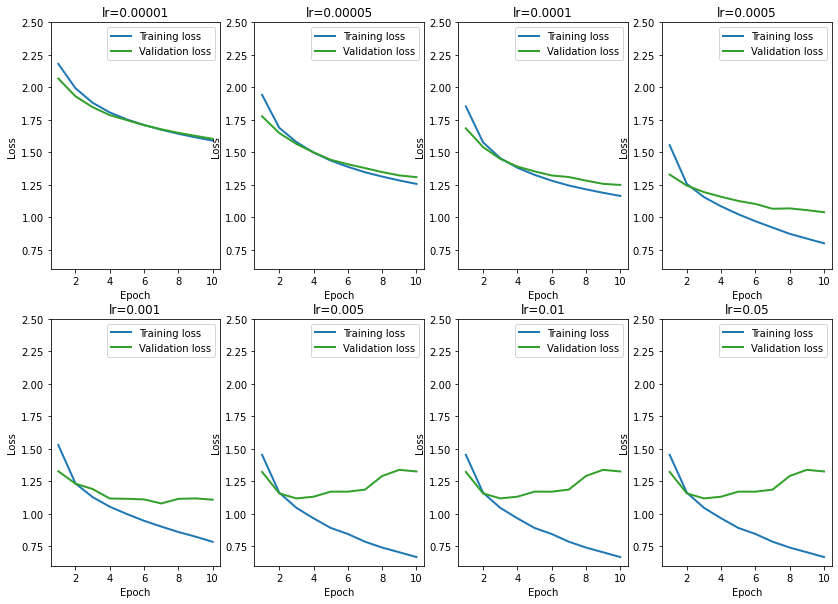

In [ ]:
x = np.arange(1, len(train_h_lr[0]) + 1)

plt.figure(figsize=(14,10))

plt.subplot(241)
plot(x, train_h_lr[0], val_h_lr[0], ylimit=[0.6, 2.5], title="lr=0.00001")

plt.subplot(242)
plot(x, train_h_lr[1], val_h_lr[1], ylimit=[0.6, 2.5], title="lr=0.00005")

plt.subplot(243)
plot(x, train_h_lr[2], val_h_lr[2], ylimit=[0.6, 2.5], title="lr=0.0001")

plt.subplot(244)
plot(x, train_h_lr[3], val_h_lr[3], ylimit=[0.6, 2.5], title="lr=0.0005")

plt.subplot(245)
plot(x, train_h_lr[4], val_h_lr[4], ylimit=[0.6, 2.5], title="lr=0.001")

plt.subplot(246)
plot(x, train_h_lr[5], val_h_lr[5], ylimit=[0.6, 2.5], title="lr=0.005")

plt.subplot(247)
plot(x, train_h_lr[5], val_h_lr[5], ylimit=[0.6, 2.5], title="lr=0.01")

plt.subplot(248)
plot(x, train_h_lr[5], val_h_lr[5], ylimit=[0.6, 2.5], title="lr=0.05")


plt.show()

We plot the train, validation and test accuracy curves with respect to different learning rate. We find that too small learning rate and too large learning rate will result in a bad accuracy in all train set, validation set and test set. **Considering the training time and optimal validation/test accuracy, we take learning rate as 0.0005 in the following experiments.**

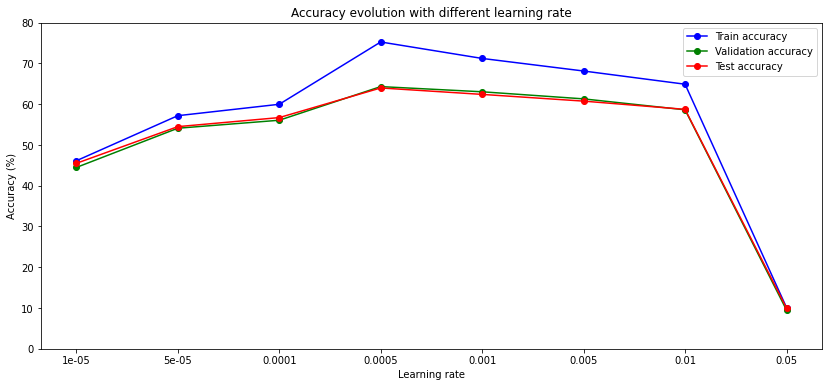

In [ ]:
plt.figure(figsize=(14,6))

x = np.arange(len(lrs))
x_idx = lrs
# plot(x, train_acc, val_acc, ylimit=[40, 100], title="batch_size=4")
plt.plot(x, train_acc_lr, color="blue", label="Train accuracy", marker='o')
plt.plot(x, val_acc_lr, color="green", label="Validation accuracy", marker='o')
plt.plot(x, test_acc_lr, color="red", label="Test accuracy", marker='o')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 80)
plt.xticks(x, x_idx)
plt.legend(loc='upper right')
plt.title("Accuracy evolution with different learning rate")
plt.show()

### Number of epochs

In this section, we test our model with more training epochs (i.e. 60) while keeping batch size as 64 and learning rate as 0.0005.

In [ ]:
epochs = 60

net = MyConvolutionalNetwork()
train_h_epoch, val_h_epoch = train(net, batch_size=64, n_epochs=epochs, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 60
learning_rate= 0.0005

Training Finished with best validation loss 1.10
Took 690.14s


We plot the training and validation loss curves as follows. We find that the lowest validation loss of 1.06 reaches at epoch 10 and then the model tends to be overfitting with a decreasing training loss and an increasing validation loss.

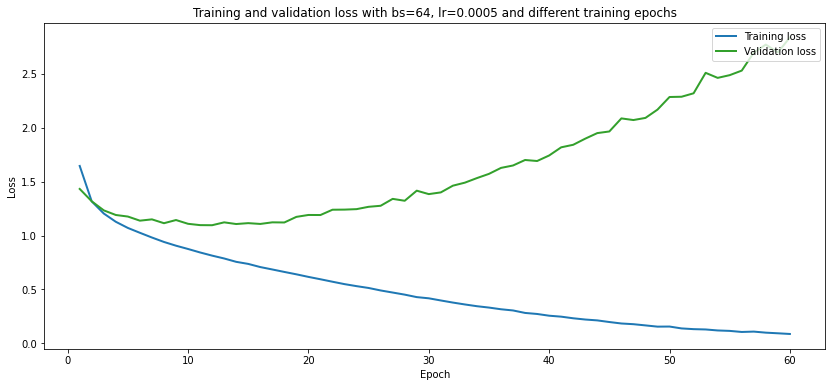

In [ ]:
plt.figure(figsize=(14,6))
x = np.arange(1, len(train_h_epoch) + 1)

plt.plot(x, train_h_epoch, color=colors[0], label="Training loss", linewidth=2)
plt.plot(x, val_h_epoch, color=colors[1], label="Validation loss", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Training and validation loss with bs=64, lr=0.0005 and different training epochs")
plt.show()

In [ ]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(val_h_epoch))
print('Lowest validation loss ever reached:', min_val_loss)
print('It is reached at epoch:', idx+1)

Lowest validation loss ever reached: 1.0958979929549784
It is reached at epoch: 12


In [ ]:
compute_accuracy(net)

Accuracy of the network on the 40000 train images: 73.70 %
Accuracy of the network on the 10000 validation images: 62.88 %
Accuracy of the network on the 10000 test images: 62.45 %


(73.7025, 62.88, 62.45)

We consider to train the model with a smaller learning rate as 0.0001 to see if it can reach a lower validation loss.

In [ ]:
epochs = 60

net = MyConvolutionalNetwork()
train_h_epoch, val_h_epoch = train(net, batch_size=64, n_epochs=epochs, learning_rate=0.0001, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 60
learning_rate= 0.0001

Training Finished with best validation loss 1.11
Took 666.59s


The following figure illustrates that the lowest validation loss of 1.08 is reached at epoch 39. However, this validation loss is no better than the former case (1.06) with larger learning as 0.0005. **As a result, we still consider learning rate of 0.0005 as the best learning rate at present.**

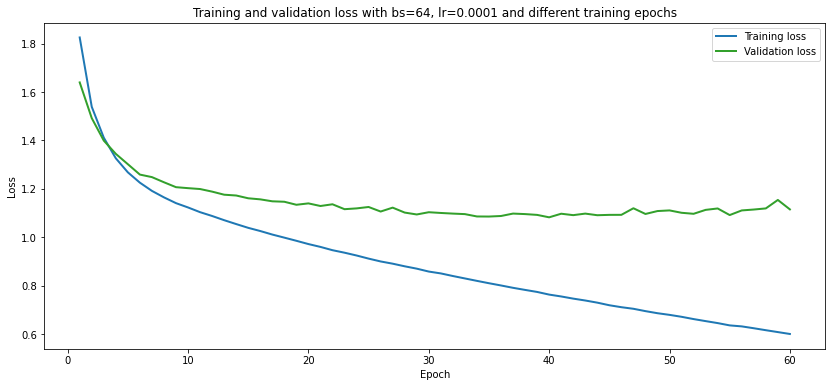

In [ ]:
plt.figure(figsize=(14,6))
x = np.arange(1, len(train_h_epoch) + 1)

plt.plot(x, train_h_epoch, color=colors[0], label="Training loss", linewidth=2)
plt.plot(x, val_h_epoch, color=colors[1], label="Validation loss", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Training and validation loss with bs=64, lr=0.0001 and different training epochs")
plt.show()

In [ ]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(val_h_epoch))
print('Lowest validation loss ever reached:', min_val_loss)
print('It is reached at epoch:', idx)

Lowest validation loss ever reached: 1.0821883693526062
It is reached at epoch: 39


We test the accuracy of the model w.r.t. different total training epochs. The results are shown as follows. We find that when the number of train epochs is too large, the train accuracy tends to be close to $100\%$ while the validation and test accuracy tend to decrease.

In [ ]:
epochs = 60
train_h_epoch = []
val_h_epoch = []

train_acc_epoch = []
val_acc_epoch = []
test_acc_epoch = []

net = MyConvolutionalNetwork()

for i in range((int)(epochs/10)):
    train_history, val_history = train(net, batch_size=64, n_epochs=10, learning_rate=0.0005, verbose=False)

    train_a, val_a, test_a = compute_accuracy(net)
    train_acc_epoch.append(train_a)
    val_acc_epoch.append(val_a)
    test_acc_epoch.append(test_a)

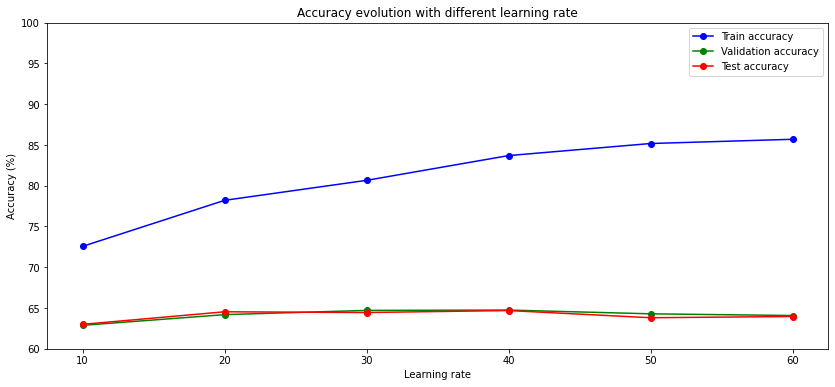

In [ ]:
plt.figure(figsize=(14,6))

x = np.arange(10, 61, 10)
# plot(x, train_acc, val_acc, ylimit=[40, 100], title="batch_size=4")
plt.plot(x, train_acc_epoch, color="blue", label="Train accuracy", marker='o')
plt.plot(x, val_acc_epoch, color="green", label="Validation accuracy", marker='o')
plt.plot(x, test_acc_epoch, color="red", label="Test accuracy", marker='o')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(60, 100)
plt.xticks(x)
plt.legend(loc='upper right')
plt.title("Accuracy evolution with different training epochs")
plt.show()

## Different network architecture

In this section, we test the performance of different network architectures and try to find a best one for this task.

### Number of conv layers

We first test if more convolutional layers yield better performance of the model. We add two more convolutional layers based on previous simple mode with only one convolutional layer. Note that we keep always the kernel size as 3.

In [ ]:
class MyConvolutionalNetwork_conv3(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork_conv3, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(18, 36, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv3 = nn.Conv2d(36, 18, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)


        self.flattened_size = 18 * 4 * 4
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x4x4
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x4x4 -> 288
        x = x.view(-1, self.flattened_size)
        # 288 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

We train our model with 3 convolutional layers with the best hyperparameters that we have found before: batch size as 64 and learning rate as 0.0005. Since we always save the model with best validation loss during training, we can set the total training epochs a little bit larger, such as 60.

We find that the best validation loss during 60 training epochs is $0.84$, which is better than the one with simple baseline model as $1.06$.

In [ ]:
net = MyConvolutionalNetwork_conv3()
train_h_epoch, val_h_epoch = train(net, batch_size=64, n_epochs=60, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 60
learning_rate= 0.0005

Training Finished with best validation loss 0.88
Took 732.49s


We plot the training and validation loss as follows. Comparing with the curves of the simple model, we find that until 60 epoch, the validation loss does not increase that much and the train accuracy increases. However, as validation loss diverges with training loss at a relative high value, we consider that the network is not complex enough, which makes the model present as underfitting and do not have high generalization capability.

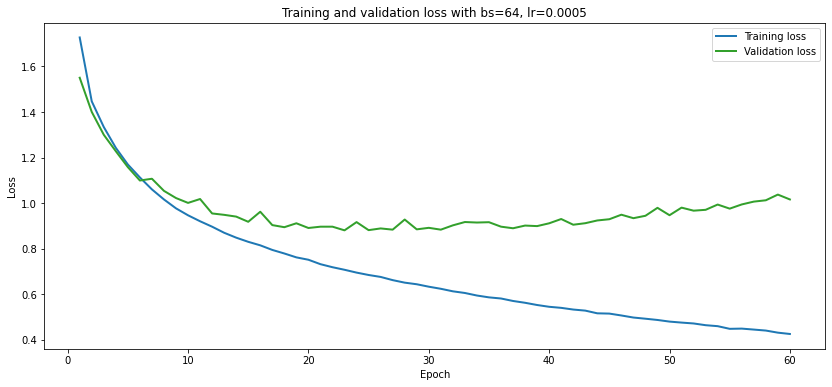

In [ ]:
plt.figure(figsize=(14,6))
x = np.arange(1, len(train_h_epoch) + 1)

plt.plot(x, train_h_epoch, color=colors[0], label="Training loss", linewidth=2)
plt.plot(x, val_h_epoch, color=colors[1], label="Validation loss", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Training and validation loss with bs=64, lr=0.0005")
plt.show()

In [ ]:
train_a, val_a, test_a = compute_accuracy(net)

Accuracy of the network on the 40000 train images: 76.61 %
Accuracy of the network on the 10000 validation images: 69.81 %
Accuracy of the network on the 10000 test images: 69.44 %


### Number of linear layers

As we have found that more convolutional layers result in better performance, we consider to also increase the number of full-connected layers. We replace one full-connected layer in previous model with three and train with the same hyperparameters as before.

In [ ]:
class MyConvolutionalNetwork_fc4(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork_fc4, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(18, 36, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv3 = nn.Conv2d(36, 18, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.flattened_size = 18 * 4 * 4
        
        self.fc1 = nn.Linear(self.flattened_size, self.flattened_size)
        self.fc2 = nn.Linear(self.flattened_size, self.flattened_size)
        self.fc3 = nn.Linear(self.flattened_size, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x4x4
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x4x4 -> 288
        x = x.view(-1, self.flattened_size)
        # 288 -> 288
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # 288 -> 64
        x = F.relu(self.fc3(x))
        # 64 -> 10
        x = self.fc4(x)
        return x

In [ ]:
net = MyConvolutionalNetwork_fc4()
train_h_epoch, val_h_epoch = train(net, batch_size=64, n_epochs=60, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 60
learning_rate= 0.0005

Training Finished with best validation loss 0.86
Took 746.93s


In [ ]:
train_a, val_a, test_a = compute_accuracy(net)

Accuracy of the network on the 40000 train images: 78.34 %
Accuracy of the network on the 10000 validation images: 70.14 %
Accuracy of the network on the 10000 test images: 69.76 %


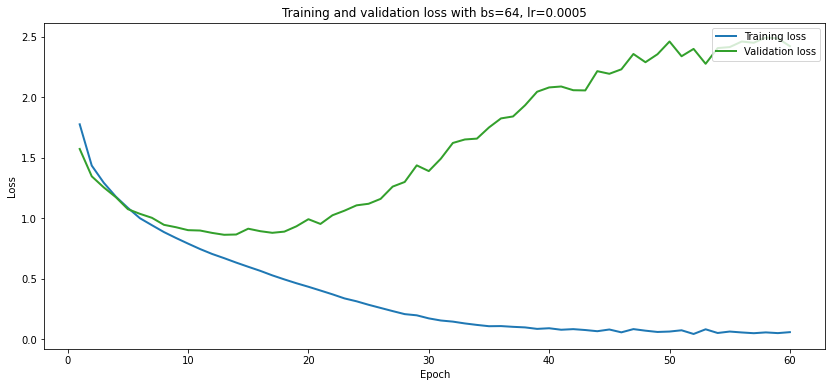

In [ ]:
plt.figure(figsize=(14,6))
x = np.arange(1, len(train_h_epoch) + 1)

plt.plot(x, train_h_epoch, color=colors[0], label="Training loss", linewidth=2)
plt.plot(x, val_h_epoch, color=colors[1], label="Validation loss", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Training and validation loss with bs=64, lr=0.0005")
plt.show()

### CNN blocks + Linear layers

Based on previous exploration, we find that deeper neural network usually performs better. We consider to use more convolutional layers by introducing convolutional blocks, where each block consists of two convolutional layers and one max pooling layer. For full-connected layers, we use three linear layers. We train this new network with the same hyperparameters as before (batch size as 64, learning rate as 0.0005).

In [ ]:
class moreCNN(nn.Module):
    def __init__(self):
        super(moreCNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.flattened_size = 256 * 4 * 4
        self.fc_layer = nn.Sequential(
            nn.Linear(self.flattened_size, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)
        )


    def forward(self, x):        
        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)

        return x

In [ ]:
MoreCNN = moreCNN()
train_h_epoch, val_h_epoch = train(MoreCNN, batch_size=64, n_epochs=60, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 60
learning_rate= 0.0005

Training Finished with best validation loss 0.67
Took 975.24s


As expected, the deeper neural network gets much better performance than before best:
* train acc: $87.42\%$ vs $78.34\%$
* validation acc: $77.35\%$ vs $70.14\%$
* test acc: $76.68\%$ vs $69.76\%$

This experimental result is in accordance with the evolution of CNN architecture: to get better performance, the network tends to be deeper and deeper.

In [ ]:
train_a, val_a, test_a = compute_accuracy(MoreCNN)

Accuracy of the network on the 40000 train images: 87.42 %
Accuracy of the network on the 10000 validation images: 77.35 %
Accuracy of the network on the 10000 test images: 76.68 %


However, when we plot the training and validation loss w.r.t. training epochs, we can find the significant **overfitting problem** that validation loss stops to increase.

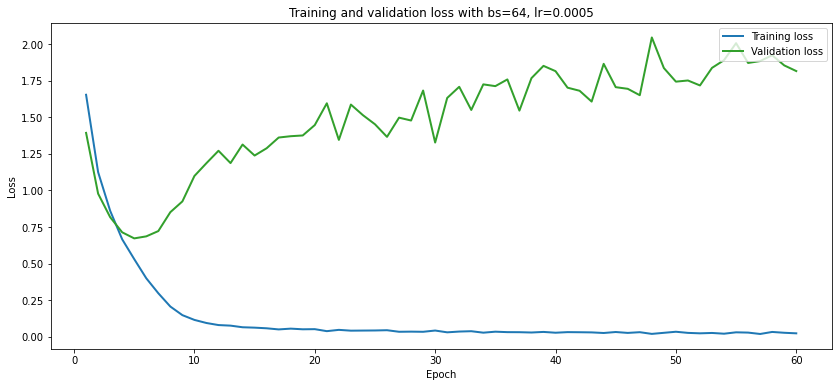

In [ ]:
plt.figure(figsize=(14,6))
x = np.arange(1, len(train_h_epoch) + 1)

plt.plot(x, train_h_epoch, color=colors[0], label="Training loss", linewidth=2)
plt.plot(x, val_h_epoch, color=colors[1], label="Validation loss", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Training and validation loss with bs=64, lr=0.0005")
plt.show()

### Dropout vs BN

To solve the overfitting problem, usual solution consists of dropout and batch normalization. In this section, we try to compare the performance of dropout and batch normalisation in convolutional layers. We use the network in "CNN blocks + Linear layers" and add dropout layer or batch normalisation layer after each convolutional layer. All experiments are performed with same hyperparameters (batch size = 64, learning rate = 0.0005, epoch = 20). We compare the training and validation loss curves of dropout with different $p$ and curves of batch normalisation.

In [ ]:
class CNN_dropout(nn.Module):
    def __init__(self, dropout=0.1):
        super(CNN_dropout, self).__init__()
        self.dropout = dropout

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.Dropout2d(p=self.dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.Dropout2d(p=self.dropout),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.Dropout2d(p=self.dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.Dropout2d(p=self.dropout),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.Dropout2d(p=self.dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.Dropout2d(p=self.dropout),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.flattened_size = 256 * 4 * 4
        self.fc_layer = nn.Sequential(
            nn.Linear(self.flattened_size, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)
        )


    def forward(self, x):        
        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)

        return x

In [ ]:
CNN_dropout_1 = CNN_dropout(0.1)
train_epoch_1, val_epoch_1 = train(CNN_dropout_1, batch_size=64, n_epochs=20, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 20
learning_rate= 0.0005

Training Finished with best validation loss 0.71
Took 284.89s


In [ ]:
CNN_dropout_2 = CNN_dropout(0.2)
train_epoch_2, val_epoch_2 = train(CNN_dropout_2, batch_size=64, n_epochs=20, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 20
learning_rate= 0.0005

Training Finished with best validation loss 0.77
Took 288.83s


In [ ]:
CNN_dropout_05 = CNN_dropout(0.05)
train_epoch_05, val_epoch_05 = train(CNN_dropout_05, batch_size=64, n_epochs=20, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 20
learning_rate= 0.0005

Training Finished with best validation loss 0.70
Took 291.68s


In [ ]:
class CNN_bn(nn.Module):
    def __init__(self):
        super(CNN_bn, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.flattened_size = 256 * 4 * 4
        self.fc_layer = nn.Sequential(
            nn.Linear(self.flattened_size, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)
        )


    def forward(self, x):        
        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)

        return x

In [ ]:
CNN_bn = CNN_bn()
train_epoch_bn, val_epoch_bn = train(CNN_bn, batch_size=64, n_epochs=20, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 20
learning_rate= 0.0005

Training Finished with best validation loss 0.53
Took 298.27s


In [ ]:
CNN_none = moreCNN()
train_epoch_none, val_epoch_none = train(CNN_none, batch_size=64, n_epochs=20, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 20
learning_rate= 0.0005

Training Finished with best validation loss 0.66
Took 282.89s


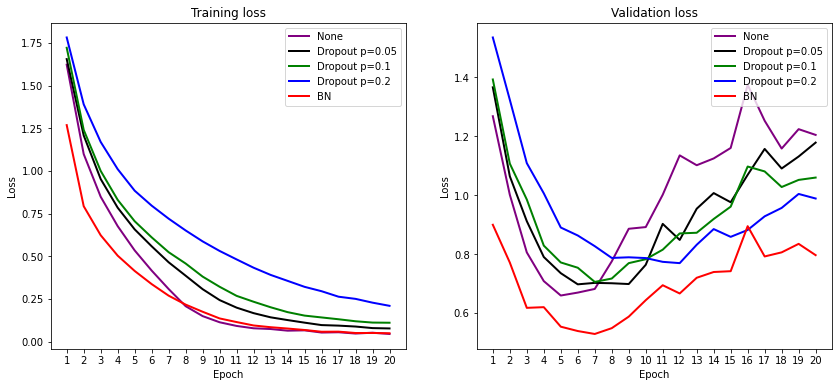

In [ ]:
plt.figure(figsize=(14,6))
x = np.arange(1, len(train_epoch_1) + 1)

plt.subplot(121)
plt.plot(x, train_epoch_none, color="purple", label="None", linewidth=2)
plt.plot(x, train_epoch_05, color="black", label="Dropout p=0.05", linewidth=2)
plt.plot(x, train_epoch_1, color="green", label="Dropout p=0.1", linewidth=2)
plt.plot(x, train_epoch_2, color="blue", label="Dropout p=0.2", linewidth=2)
plt.plot(x, train_epoch_bn, color="red", label="BN", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(x)
plt.legend(loc='upper right')
plt.title("Training loss")

plt.subplot(122)
plt.plot(x, val_epoch_none, color="purple", label="None", linewidth=2)
plt.plot(x, val_epoch_05, color="black", label="Dropout p=0.05", linewidth=2)
plt.plot(x, val_epoch_1, color="green", label="Dropout p=0.1", linewidth=2)
plt.plot(x, val_epoch_2, color="blue", label="Dropout p=0.2", linewidth=2)
plt.plot(x, val_epoch_bn, color="red", label="BN", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(x)
plt.legend(loc='upper right')
plt.title("Validation loss")
plt.show()

As the plot shown above, we can easily conclude that batch normalisation layer performs much better than dropout solution in our CNN model. As a result, we consider to use **batch normalisation** to further improve our model performance.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=train_sampler,
                                          num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128,
                                         num_workers=num_workers)

train_a, val_a, test_a = compute_accuracy(CNN_none)

Accuracy of the network on the 40000 train images: 86.66 %
Accuracy of the network on the 10000 validation images: 77.29 %
Accuracy of the network on the 10000 test images: 77.31 %


In [ ]:
train_a, val_a, test_a = compute_accuracy(CNN_bn)

Accuracy of the network on the 40000 train images: 94.37 %
Accuracy of the network on the 10000 validation images: 83.04 %
Accuracy of the network on the 10000 test images: 82.80 %


As the computed accuracy of original best and BN version, we find adding batch normalization after convolutinal layers significantly improves the accuracy in all train, validation and test set. We note that the current best test accuracy is $82.80\%$, which improves around $5.5\%$ than before best.

### VGG16

We try to apply a famous network architecture, VGG16, which consists of even more convolutional blocks and each convolutional layer is connected to a batch normalization layer. We apply the same hyperparameters as before on VGG16 to train.

In [ ]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.flattened_size = 512 * 1 * 1
        self.classifier = nn.Sequential(
            nn.Linear(self.flattened_size, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out


In [ ]:
MyVGG = VGG()
train_h_epoch, val_h_epoch = train(MyVGG, batch_size=64, n_epochs=30, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 30
learning_rate= 0.0005

Training Finished with best validation loss 0.54
Took 902.67s


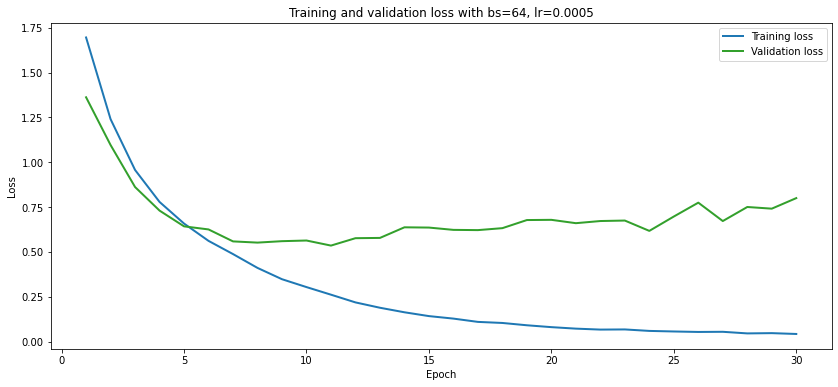

In [ ]:
plt.figure(figsize=(14,6))
x = np.arange(1, len(train_h_epoch) + 1)

plt.plot(x, train_h_epoch, color=colors[0], label="Training loss", linewidth=2)
plt.plot(x, val_h_epoch, color=colors[1], label="Validation loss", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Training and validation loss with bs=64, lr=0.0005")
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=train_sampler,
                                          num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128,
                                         num_workers=num_workers)
train_a, val_a, test_a = compute_accuracy(MyVGG)

Accuracy of the network on the 40000 train images: 94.70 %
Accuracy of the network on the 10000 validation images: 83.99 %
Accuracy of the network on the 10000 test images: 83.18 %


As results shown above, VGG16 with much more convolutional layers improves the performance than before best model by around $0.5\%$.

## Larger train set

In this section, We train VGG16 model on a larger train set than before, which consists of 49000 images in train set and only 1000 for validation set. Note that all hyperparameters are set as before.

In [ ]:
n_training_samples = 49000 # Max: 50 000 - n_val_samples
n_val_samples = 1000


train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))

val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128,
                                         num_workers=num_workers)

In [ ]:
MyVGG_larger = VGG()
train_h_epoch, val_h_epoch = train(MyVGG_larger, batch_size=64, n_epochs=30, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 30
learning_rate= 0.0005

Training Finished with best validation loss 0.49
Took 1030.65s


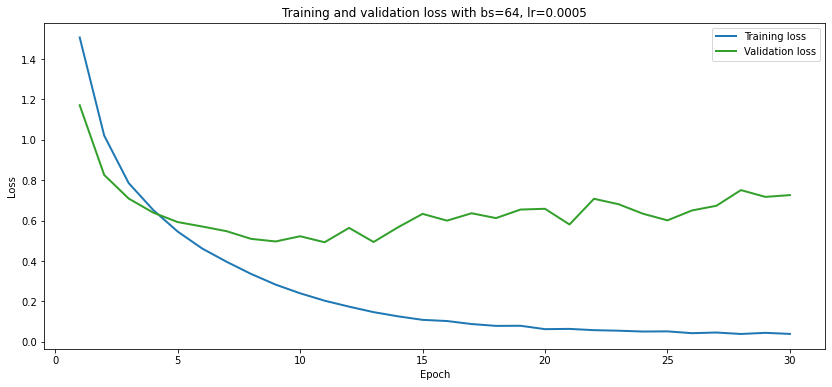

In [ ]:
plt.figure(figsize=(14,6))
x = np.arange(1, len(train_h_epoch) + 1)

plt.plot(x, train_h_epoch, color=colors[0], label="Training loss", linewidth=2)
plt.plot(x, val_h_epoch, color=colors[1], label="Validation loss", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Training and validation loss with bs=64, lr=0.0005")
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=train_sampler,
                                          num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128,
                                         num_workers=num_workers)
train_a, val_a, test_a = compute_accuracy(MyVGG_larger)

Accuracy of the network on the 49000 train images: 95.35 %
Accuracy of the network on the 1000 validation images: 86.10 %
Accuracy of the network on the 10000 test images: 84.71 %


The experimental results show that, with $9000$ more images to train, the train accuracy does not change much as before while the test accuracy improves by around $1.5\%$.

## Data augmentation

As more training data shows its significant impact on the model performance on test set, we test a simple type of data augmentation in this part to explore if it can further improve our model performance. We choose a simple data augmentation, the random horizontal flip, to test. Note that we are still using the split of $49000$ training images and $1000$ validation images. All hyperparameters of VGG16 remain as before.

In [ ]:
transform_train = transforms.Compose(
    [
     transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

train_set = torchvision.datasets.CIFAR10(root='./data_v', train=True,
                                        download=True, transform=transform_train)

test_set = torchvision.datasets.CIFAR10(root='./data_v', train=False,
                                        download=True, transform=transform_test)

n_training_samples = 49000 # Max: 50 000 - n_val_samples
n_val_samples = 1000


train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))

val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128,
                                         num_workers=num_workers)

Extracting ./data_v/cifar-10-python.tar.gz to ./data_v
Files already downloaded and verified


In [ ]:
MyVGG_aug = VGG()
train_h_epoch, val_h_epoch = train(MyVGG_aug, batch_size=64, n_epochs=30, learning_rate=0.0005, verbose=False)



===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 30
learning_rate= 0.0005

Training Finished with best validation loss 0.35
Took 1031.36s


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=train_sampler,
                                          num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128,
                                         num_workers=num_workers)
train_a, val_a, test_a = compute_accuracy(MyVGG_aug)

Accuracy of the network on the 49000 train images: 94.27 %
Accuracy of the network on the 1000 validation images: 88.90 %
Accuracy of the network on the 10000 test images: 87.86 %


As the computed accuracy shown above, this simple data augmentation shows its great power to improve the model performance on test set: the test accuracy increases around $3\%$ than before best. **It is reasonable to believe that by adding more types of data augmentation, the model performance can be further improved.**

## Analysis of the best model performance

We further analyse the current best model performance by computing the accuracy per class and the confusion matrix.

From the accuracy per class, we find that most classes have high accuracy, and cat and frog are two classes with relatively low accuracy.

In [ ]:
confusion_matrix = accuracy_per_class(MyVGG_aug)

Class      Accuracy (%)
plane        93.10   
car          96.43   
bird         81.82   
cat          76.47   
deer         92.59   
dog          84.85   
frog         75.00   
horse        96.00   
ship         96.88   
truck        82.05   


We look into the details of confusion matrix. We find that cat and dog are easily confused by the model, so as frog and cat. Apart from animals, truck and car are also easily mispredicted by the model. We consider that if we have more images of these classes in the train set, the performance on these classes may improve.

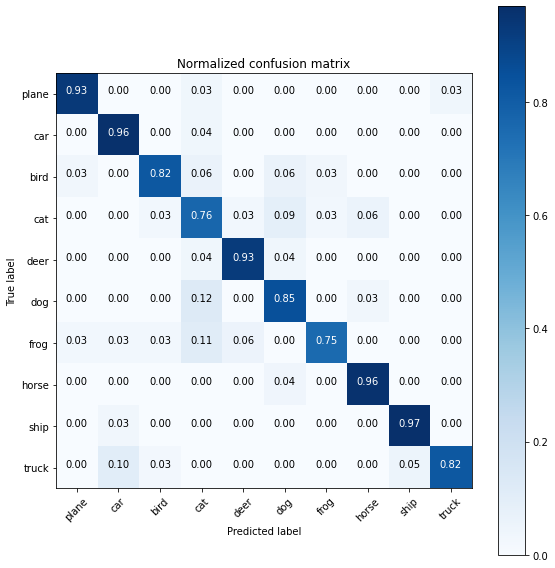

In [ ]:
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

## Conclusion

We have tested our model with different hyperparameters based on the most simple network and then explored different network architecture to improve the model performance. We can conclude our experimental results as follows:
* Small batch size setting takes more time to train than large batch size setting. When the batch size is smaller, the loss curve is more noisy while with larger batch size, the loss curve is smoother. When the batch size is too small or too large, the training can miss the optimal point and accuracy on all sets will be low.
* Smaller learning rate results in slower convergence with a finer loss curve, which requires more epochs to reach the optimal value. Larger learning rate converges faster with a coarser loss curve, which can easily miss the optimal point.
* More training epochs are needed when learning rate is small, but if we do not change our learning rate to a smaller one, more training epochs do not improve the performance of the model.
* More convolutional layers and more full-connected layers can prevent the model from underfitting and result in better performance.
* To prevent overfitting problem, batch normalisation after each convolutional layer has better performance than dropout solution. Batch normalisation can significantly improve the performance of our model on all sets.
* Larger train set and data augmentation can greatly improve the generalization capability of the model, and thus the accuracy on test set.

Note that the best performance we have ever reached with above experiments is $87.86\%$ on the test set with VGG16 model, train set with $49000$ images,  data augmentation of random horizontal flip, batch size of $64$, learning rate of $0.0005$, total training epoch of $30$.

To further improve the performance of the model, some potential methods are proposed as follows:
* As the above experiments show that more convolutional layers always result in better performance, a deeper neural network is worth trying, such as ResNet and DenseNet.
* According to our experiments, a simple data augmentation improves significantly the accuracy on test set. Therefore, more type of data augmentation can potentially improve the performance of the model.
* It is also possible to finetune the model to find the best hyperparameters which enables to explore the best the model can do.

# Going further

- [Coursera Course on CNN](https://www.coursera.org/learn/convolutional-neural-networks)
- [Stanford Course](http://cs231n.stanford.edu/syllabus.html)
- [PyTorch Tutorial](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- [How backpropagation works](http://michaelnielsen.org/blog/how-the-backpropagation-algorithm-works/) (Michael Nielsen)

If you feel like this was too easy peasy:

-Investigate further [optimization methods](https://pytorch.org/docs/stable/optim.html) beyond SGD, and Adam and their parameters.

-Look at ways to improve your network using regularization techniques

-Look at ways to visualize network activations for model interpretability

-Use transfer learning, in order to use torchvision with pretrained=True with some pretrained models


Acknowledgements: 
This tutorial is based on the [original PyTorch tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) and was adapted by [Antonin Raffin](http://araffin.github.io/) for the ROB313 course at ENSTA Paris. Thanks to Clement Pinard for feedback!


### More documentation/ questions to explore about Google Colab: 

-How to connect your Google Drive with Google Colab?

-How to import a new notebook and save it to your GDrive?

-How to use files which are contained in your GDrive?

Some tips [here](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)




## Extras to read later
### Visualizing Convolution parameters:
[A guide to convolution arithmetic for deep learning](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) 
by Vincent Dumoulin, Francesco Visin 


### Documentation of autograd and Function: 
[Autograd](http://pytorch.org/docs/autograd)
